# Why installation time is high in the delivery of IPVPN solutions?

Interpretation of what are the issues causing the time to installation to be high in the delivery of IPVPN solutions.

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Zooming tools 
import mpld3
mpld3.disable_notebook()


# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')


# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data 'bell_dataset'
dataframe = pd.read_excel('bell_dataset.xlsx')


In [3]:
# view the data
dataframe.head(15)


,ord_num,ord_create_date,ord_status,ord_contract_status,territory_region,prod_access_speed_mbps,ord_fibe_status,ord_build_type,ord_proj_type,cust_id,postal_cd_clean,task_type_or_reject_reason,task_reject_reason,task_last_roadblock,task_current_status,task_create_date,task_compl_date,task_age_bus_days,task_age_cal_days
0,20320_409-I001,2017-05-01,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,CE PROJECT,34823,N2N0B1,Validate Customer Account,NaN,NaN,Completed,2017-05-01,2017-05-01 00:00:00,0.03,0
1,20320_409-I001,2017-05-01,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,CE PROJECT,34823,N2N0B1,Network Identification,NaN,NaN,Completed,2017-05-01,2017-05-11 00:00:00,7.96,10
2,20320_409-I001,2017-05-01,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,CE PROJECT,34823,N2N0B1,Quote Completed,NaN,NaN,Completed,2017-05-11,2017-05-11 00:00:00,0.24,0
3,20320_409-I001,2017-05-01,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,CE PROJECT,34823,N2N0B1,Presales Signed,NaN,NaN,Completed,2017-05-11,2017-05-11 00:00:00,0.05,0
4,20320_409-I001,2017-05-01,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,CE PROJECT,34823,N2N0B1,Network Discovery,NaN,NaN,Completed,2017-05-11,2017-05-21 00:00:00,6.08,10
5,20320_409-I001,2017-05-01,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,CE PROJECT,34823,N2N0B1,Site Visit Required,SV - CUSTOMER CONDUIT REQUIRED,Rejection,Completed,2017-05-21,2017-08-28 00:00:00,70.40,99
6,20320_409-I001,2017-05-01,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,CE PROJECT,34823,N2N0B1,Build Access,NaN,Waiting Completion of PMG Task,In Progress,2017-05-21,?,134.00,?
7,20320_409-I001,2017-05-01,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,CE PROJECT,34823,N2N0B1,Core Port Assignment,NaN,NaN,Completed,2017-05-21,2017-05-23 00:00:00,1.21,2
8,20320_409-I001,2017-05-01,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,CE PROJECT,34823,N2N0B1,Pricing and Proposal,NaN,NaN,Completed,2017-05-21,2017-05-24 00:00:00,2.42,3
9,20320_409-I001,2017-05-01,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,CE PROJECT,34823,N2N0B1,Set NRD,NaN,Waiting for Site Visit to Complete,Required,2017-05-21,?,134.00,?


In [4]:
dataframe.describe()

,prod_access_speed_mbps,cust_id,task_age_bus_days
count,22494.000000,22494.000000,22494.000000
mean,112.663510,51930.722726,27.283497
std,699.663732,23396.962209,45.602969
min,1.500000,134.000000,0.000000
25%,5.000000,34823.000000,0.270000
50%,10.000000,50291.000000,3.910000
75%,20.000000,67271.000000,32.780000
max,10000.000000,99551.000000,289.740000


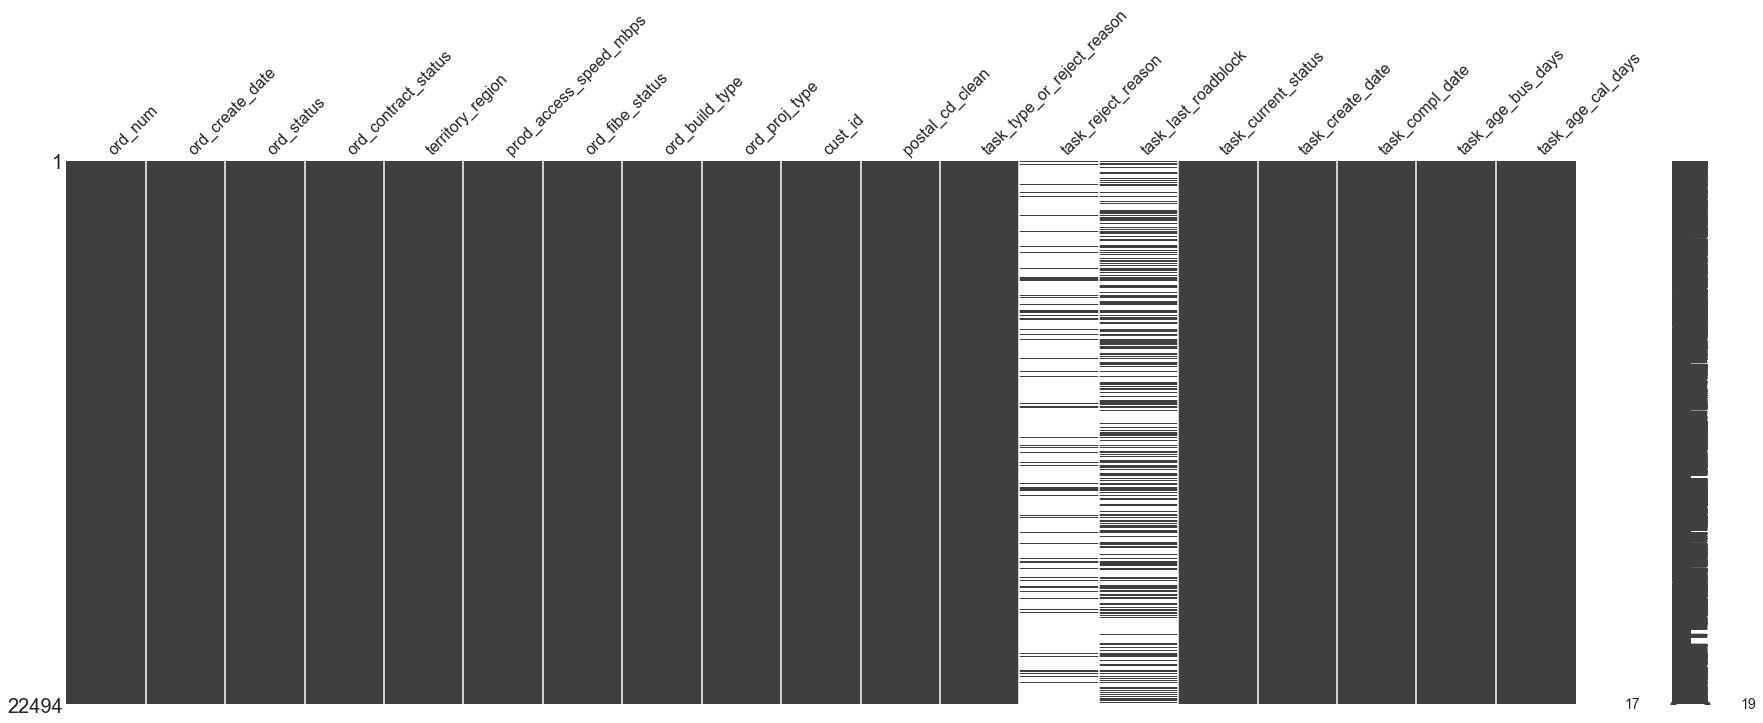

In [5]:
# graphic plot of missing values
missingno.matrix(dataframe, figsize = (30,10))

In [6]:
dataframe = dataframe.sort_values(by='ord_create_date')

In [7]:
dataframe.head()

,ord_num,ord_create_date,ord_status,ord_contract_status,territory_region,prod_access_speed_mbps,ord_fibe_status,ord_build_type,ord_proj_type,cust_id,postal_cd_clean,task_type_or_reject_reason,task_reject_reason,task_last_roadblock,task_current_status,task_create_date,task_compl_date,task_age_bus_days,task_age_cal_days
14816,14346_691-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L6M0N2,Network Identification,NaN,NaN,Completed,2017-01-03,2017-01-25 00:00:00,16.10,22
18305,17876_507-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L8W3M2,Presales Signed,NaN,NaN,Completed,2017-01-25,2017-01-25 00:00:00,0.01,0
12803,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,Pricing and Proposal,NaN,NaN,Completed,2017-02-28,2017-03-01 00:00:00,0.19,1
12804,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,Set NRD,NaN,Waiting for Site Visit to Complete,Required,2017-02-28,?,190.19,?
12805,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,PMG,NaN,Waiting FDWS,Completed,2017-02-28,2017-06-08 00:00:00,71.76,100


In [8]:
# we can clearly see a lot of missing values in task_reject_reason & task_last_roadblock columns
# Now lets check missing values without using missingno
def missing_values(df):
    dfsize = len(df)
    total_missing_values = {}
    for column in df.columns:
        total_entry_values = df[column].value_counts().sum()
        total_missing_values[column] = dfsize - total_entry_values
    return total_missing_values

missing_values = missing_values(dataframe)
missing_values

{'ord_num': 0,
 'ord_create_date': 0,
 'ord_status': 0,
 'ord_contract_status': 0,
 'territory_region': 0,
 'prod_access_speed_mbps': 0,
 'ord_fibe_status': 0,
 'ord_build_type': 0,
 'ord_proj_type': 0,
 'cust_id': 0,
 'postal_cd_clean': 0,
 'task_type_or_reject_reason': 0,
 'task_reject_reason': 19753,
 'task_last_roadblock': 12872,
 'task_current_status': 0,
 'task_create_date': 0,
 'task_compl_date': 0,
 'task_age_bus_days': 0,
 'task_age_cal_days': 0}

In [9]:
dataframe.isnull().sum()

ord_num                           0
ord_create_date                   0
ord_status                        0
ord_contract_status               0
territory_region                  0
prod_access_speed_mbps            0
ord_fibe_status                   0
ord_build_type                    0
ord_proj_type                     0
cust_id                           0
postal_cd_clean                   0
task_type_or_reject_reason        0
task_reject_reason            19753
task_last_roadblock           12872
task_current_status               0
task_create_date                  0
task_compl_date                   0
task_age_bus_days                 0
task_age_cal_days                 0
dtype: int64

In [10]:
dataframe.get_dtype_counts()

float64            2
int64              1
datetime64[ns]     2
object            14
dtype: int64

In [11]:
# To perform our data analysis, let's create a new dataframe
new_df_bin = pd.DataFrame()


In [12]:
dataframe.dtypes


ord_num                               object
ord_create_date               datetime64[ns]
ord_status                            object
ord_contract_status                   object
territory_region                      object
prod_access_speed_mbps               float64
ord_fibe_status                       object
ord_build_type                        object
ord_proj_type                         object
cust_id                                int64
postal_cd_clean                       object
task_type_or_reject_reason            object
task_reject_reason                    object
task_last_roadblock                   object
task_current_status                   object
task_create_date              datetime64[ns]
task_compl_date                       object
task_age_bus_days                    float64
task_age_cal_days                     object
dtype: object

## let's explore with these features individually

## Target Feature : ord_status


In Flight    20806
PreSales      1688
Name: ord_status, dtype: int64


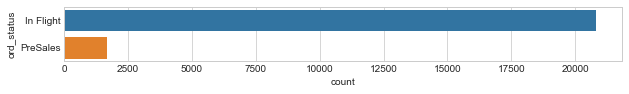

In [13]:
# what are ord_status categories and frequency of each category
fig = plt.figure(figsize=(10,1))
sns.countplot(y='ord_status', data=dataframe);
print(dataframe.ord_status.value_counts())

In [15]:
# let's add ord_create_date & ord_status to our subset dataframes
new_df_bin['ord_create_date'] = dataframe['ord_create_date']
new_df_bin['ord_status'] = dataframe['ord_status']

In [16]:
new_df_bin['ord_status'].value_counts()

In Flight    20806
PreSales      1688
Name: ord_status, dtype: int64

# It's pretty clear that the majority is In flight


In [17]:
def percentage(column):
    counts = column.value_counts()
    percent = column.value_counts(normalize=True)
    percent100 = column.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    return pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
    
percentage(new_df_bin.ord_status)

,counts,per,per100
In Flight,20806,0.924958,92.5%
PreSales,1688,0.075042,7.5%


# Target Feature : ord_contract_status

Signed    20573
Quote      1765
Firm        156
Name: ord_contract_status, dtype: int64


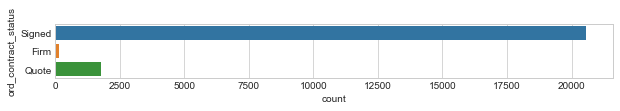

In [18]:
# what are ord_status categories and frequency of each category
fig = plt.figure(figsize=(10,1))
sns.countplot(y='ord_contract_status', data=dataframe);
print(dataframe.ord_contract_status.value_counts())

In [19]:
new_df_bin['ord_contract_status'] = dataframe['ord_contract_status']


Signed    20573
Quote      1765
Firm        156
Name: ord_contract_status, dtype: int64


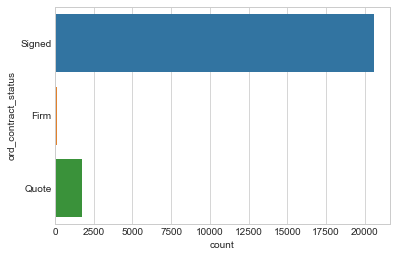

In [20]:
sns.countplot(y='ord_contract_status', data=new_df_bin);
print(new_df_bin.ord_contract_status.value_counts())

In [21]:
# checking for null values
new_df_bin.ord_contract_status.isnull().sum()

0

In [22]:
new_df_bin.head()

,ord_create_date,ord_status,ord_contract_status
14816,2017-01-03,In Flight,Signed
18305,2017-01-03,In Flight,Signed
12803,2017-01-03,In Flight,Signed
12804,2017-01-03,In Flight,Signed
12805,2017-01-03,In Flight,Signed


#  No signed presales , No quoted In flight

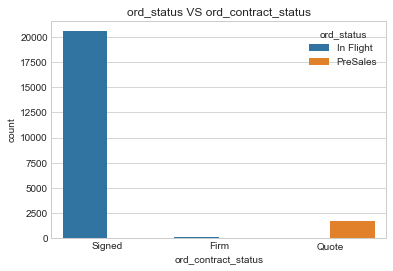

<Figure size 432x288 with 0 Axes>

In [23]:

plt.title('ord_status VS ord_contract_status')
sns.countplot(new_df_bin.ord_contract_status, hue=new_df_bin['ord_status'])
plt.show()
plt.savefig('ord_status_vs_ord_contract_status.pdf')

# Target Feature: territory_region

In [24]:
dataframe.territory_region.value_counts()

ONTARIO                 16819
QUEBEC                   2448
ALBERTA                  1072
BRITISH COLUMBIA          743
NOVA SCOTIA               543
NEW BRUNSWICK             379
NEWFOUNDLAND              199
NOT AVAILABLE             187
MANITOBA                   75
PRINCE EDWARD ISLAND       29
Name: territory_region, dtype: int64

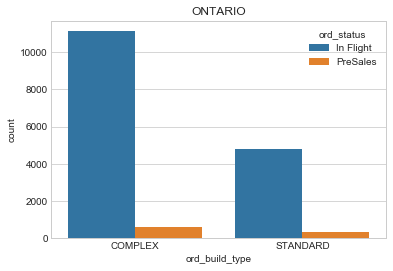

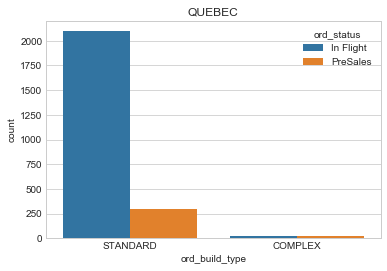

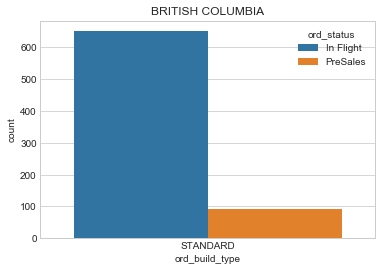

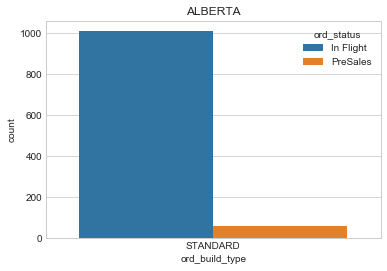

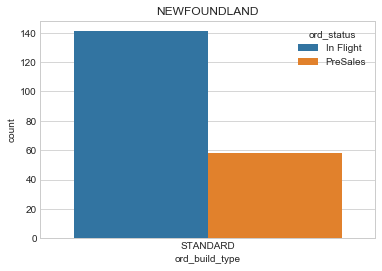

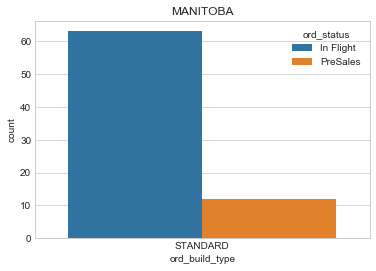

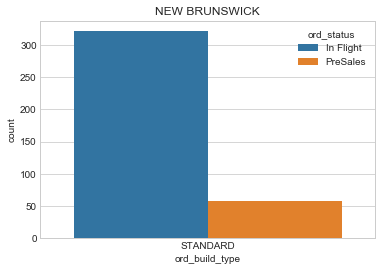

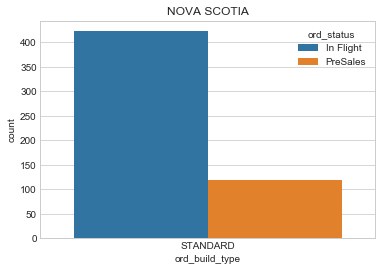

In [25]:
 
ON = dataframe[dataframe.territory_region == 'ONTARIO']
plt.title('ONTARIO')
sns.countplot(ON.ord_build_type, hue=ON['ord_status'])
#sns.('DISTRIBUTION OF BUILD TYPE ACCORDING TO ORDER STATUS IN ONTARIO')
plt.show()
plt.title('QUEBEC')
QC = dataframe[dataframe.territory_region == 'QUEBEC']
sns.countplot(QC.ord_build_type, hue=QC['ord_status'])
plt.show()
plt.title('BRITISH COLUMBIA')
BC = dataframe[dataframe.territory_region == 'BRITISH COLUMBIA']
sns.countplot(BC.ord_build_type, hue=BC['ord_status'])
plt.show()
plt.title('ALBERTA')
AL = dataframe[dataframe.territory_region == 'ALBERTA']
sns.countplot(AL.ord_build_type, hue=AL['ord_status'])
plt.show()
plt.title('NEWFOUNDLAND')
NF = dataframe[dataframe.territory_region == 'NEWFOUNDLAND']
sns.countplot(NF.ord_build_type, hue=NF['ord_status'])
plt.show()
plt.title('MANITOBA')
MA = dataframe[dataframe.territory_region == 'MANITOBA']
sns.countplot(MA.ord_build_type, hue=MA['ord_status'])
plt.show()
plt.title('NEW BRUNSWICK')
NB = dataframe[dataframe.territory_region == 'NEW BRUNSWICK']
sns.countplot(NB.ord_build_type, hue=NB['ord_status'])
plt.show()
plt.title('NOVA SCOTIA')
NS = dataframe[dataframe.territory_region == 'NOVA SCOTIA']
sns.countplot(NS.ord_build_type, hue=NS['ord_status'])
plt.show()


In [26]:
new_df_bin['territory_region'] = dataframe['territory_region']

# Most orders located in Ontario & Quebec

In [27]:
percentage(new_df_bin.territory_region)

,counts,per,per100
ONTARIO,16819,0.747711,74.8%
QUEBEC,2448,0.108829,10.9%
ALBERTA,1072,0.047657,4.8%
BRITISH COLUMBIA,743,0.033031,3.3%
NOVA SCOTIA,543,0.024140,2.4%
NEW BRUNSWICK,379,0.016849,1.7%
NEWFOUNDLAND,199,0.008847,0.9%
NOT AVAILABLE,187,0.008313,0.8%
MANITOBA,75,0.003334,0.3%
PRINCE EDWARD ISLAND,29,0.001289,0.1%


# Target feature : ord_build_type

In [28]:
dataframe.ord_build_type.value_counts()

COMPLEX     11754
STANDARD    10740
Name: ord_build_type, dtype: int64

COMPLEX     11754
STANDARD    10740
Name: ord_build_type, dtype: int64


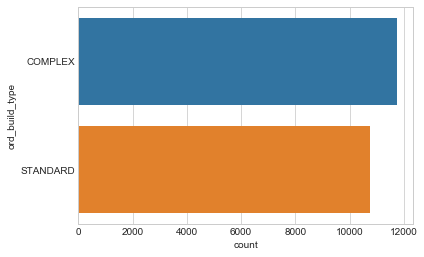

In [29]:
sns.countplot(y='ord_build_type', data=dataframe);
print(dataframe.ord_build_type.value_counts())

In [30]:
# add ord_build_type to new_df_bin
new_df_bin['ord_build_type'] = dataframe['ord_build_type']

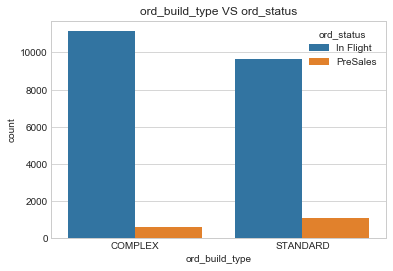

In [31]:
# ord_build_type VS ord_status
plt.title('ord_build_type VS ord_status')
sns.countplot(new_df_bin.ord_build_type, hue=new_df_bin['ord_status'])
plt.show()


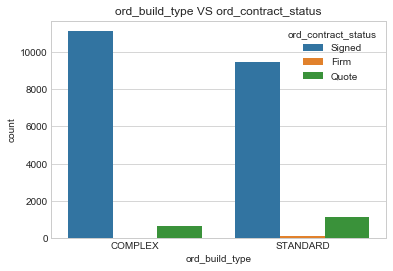

In [32]:
# ord_build_type VS ord_contract_status
plt.title('ord_build_type VS ord_contract_status')
sns.countplot(new_df_bin.ord_build_type, hue=new_df_bin['ord_contract_status'])
plt.show()

# Presence of Complex build type only in Ontario and quebec

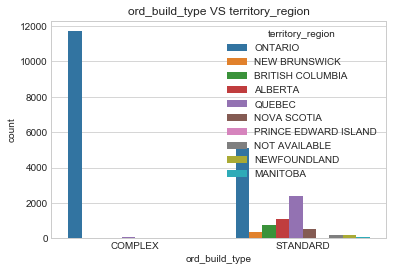

In [33]:
# ord_build_type VS ord_contract_status
plt.title('ord_build_type VS territory_region')
sns.countplot(new_df_bin.ord_build_type, hue=new_df_bin['territory_region'])
plt.show()

# Target Feature: prod_access_speed_mbps

In [34]:
dataframe.prod_access_speed_mbps.value_counts()

10.0       8311
5.0        4955
3.0        2039
20.0       1862
100.0      1449
50.0        925
200.0       552
150.0       345
30.0        297
1000.0      271
40.0        269
1.5         244
250.0       118
2000.0      116
400.0       110
3000.0      107
300.0        98
500.0        94
10000.0      94
600.0        72
60.0         58
70.0         32
1500.0       29
25.0         27
80.0         16
350.0         4
Name: prod_access_speed_mbps, dtype: int64

In [35]:
new_df_bin['prod_access_speed_mbps'] = dataframe['prod_access_speed_mbps']



In [36]:
new_df_bin.head()

,ord_create_date,ord_status,ord_contract_status,territory_region,ord_build_type,prod_access_speed_mbps
14816,2017-01-03,In Flight,Signed,ONTARIO,COMPLEX,10.0
18305,2017-01-03,In Flight,Signed,ONTARIO,COMPLEX,10.0
12803,2017-01-03,In Flight,Signed,ONTARIO,COMPLEX,10.0
12804,2017-01-03,In Flight,Signed,ONTARIO,COMPLEX,10.0
12805,2017-01-03,In Flight,Signed,ONTARIO,COMPLEX,10.0


In [37]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(50, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "In Flight"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "PreSales"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "In Flight"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "PreSales"});

In [38]:
# # Visualise the counts of SibSp and the distribution of the values
# # against Survived
# plot_count_dist(new_df_bin, 
#                 bin_df=new_df_bin, 
#                 label_column='ord_status', 
#                 target_column='prod_access_speed_mbps', 
#                 figsize=(20, 10))

In [40]:
def gen_scatterplots(dataframe, target_column, list_of_columns, cols=1, file=None):
    rows = math.ceil(len(list_of_columns)/cols)
    figwidth = 15* cols
    figheight = 10 * rows
    
    fig, ax = plt.subplots(nrows = rows,
                           ncols = cols,
                          figsize = (figwidth, figheight))
    color_choices = ['blue','grey','goldenrod','r', 'black', 'darkorange','g']
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        ax[i].scatter(dataframe[column],
                      dataframe[target_column],
                     color=color_choices[i % len(color_choices)],
                     alpha = 0.1)
        
        ax[i].set_ylabel(f'{target_column}', fontsize=20)
        ax[i].set_xlabel(f'{column}',fontsize=20)
        
    fig.suptitle('\nEach Feature vs Target Scatter Plots', size = 14)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    return

# Presence of high speed at end of order creation, while almost the same distribution for the rest 
## no relation between long installion time and speed

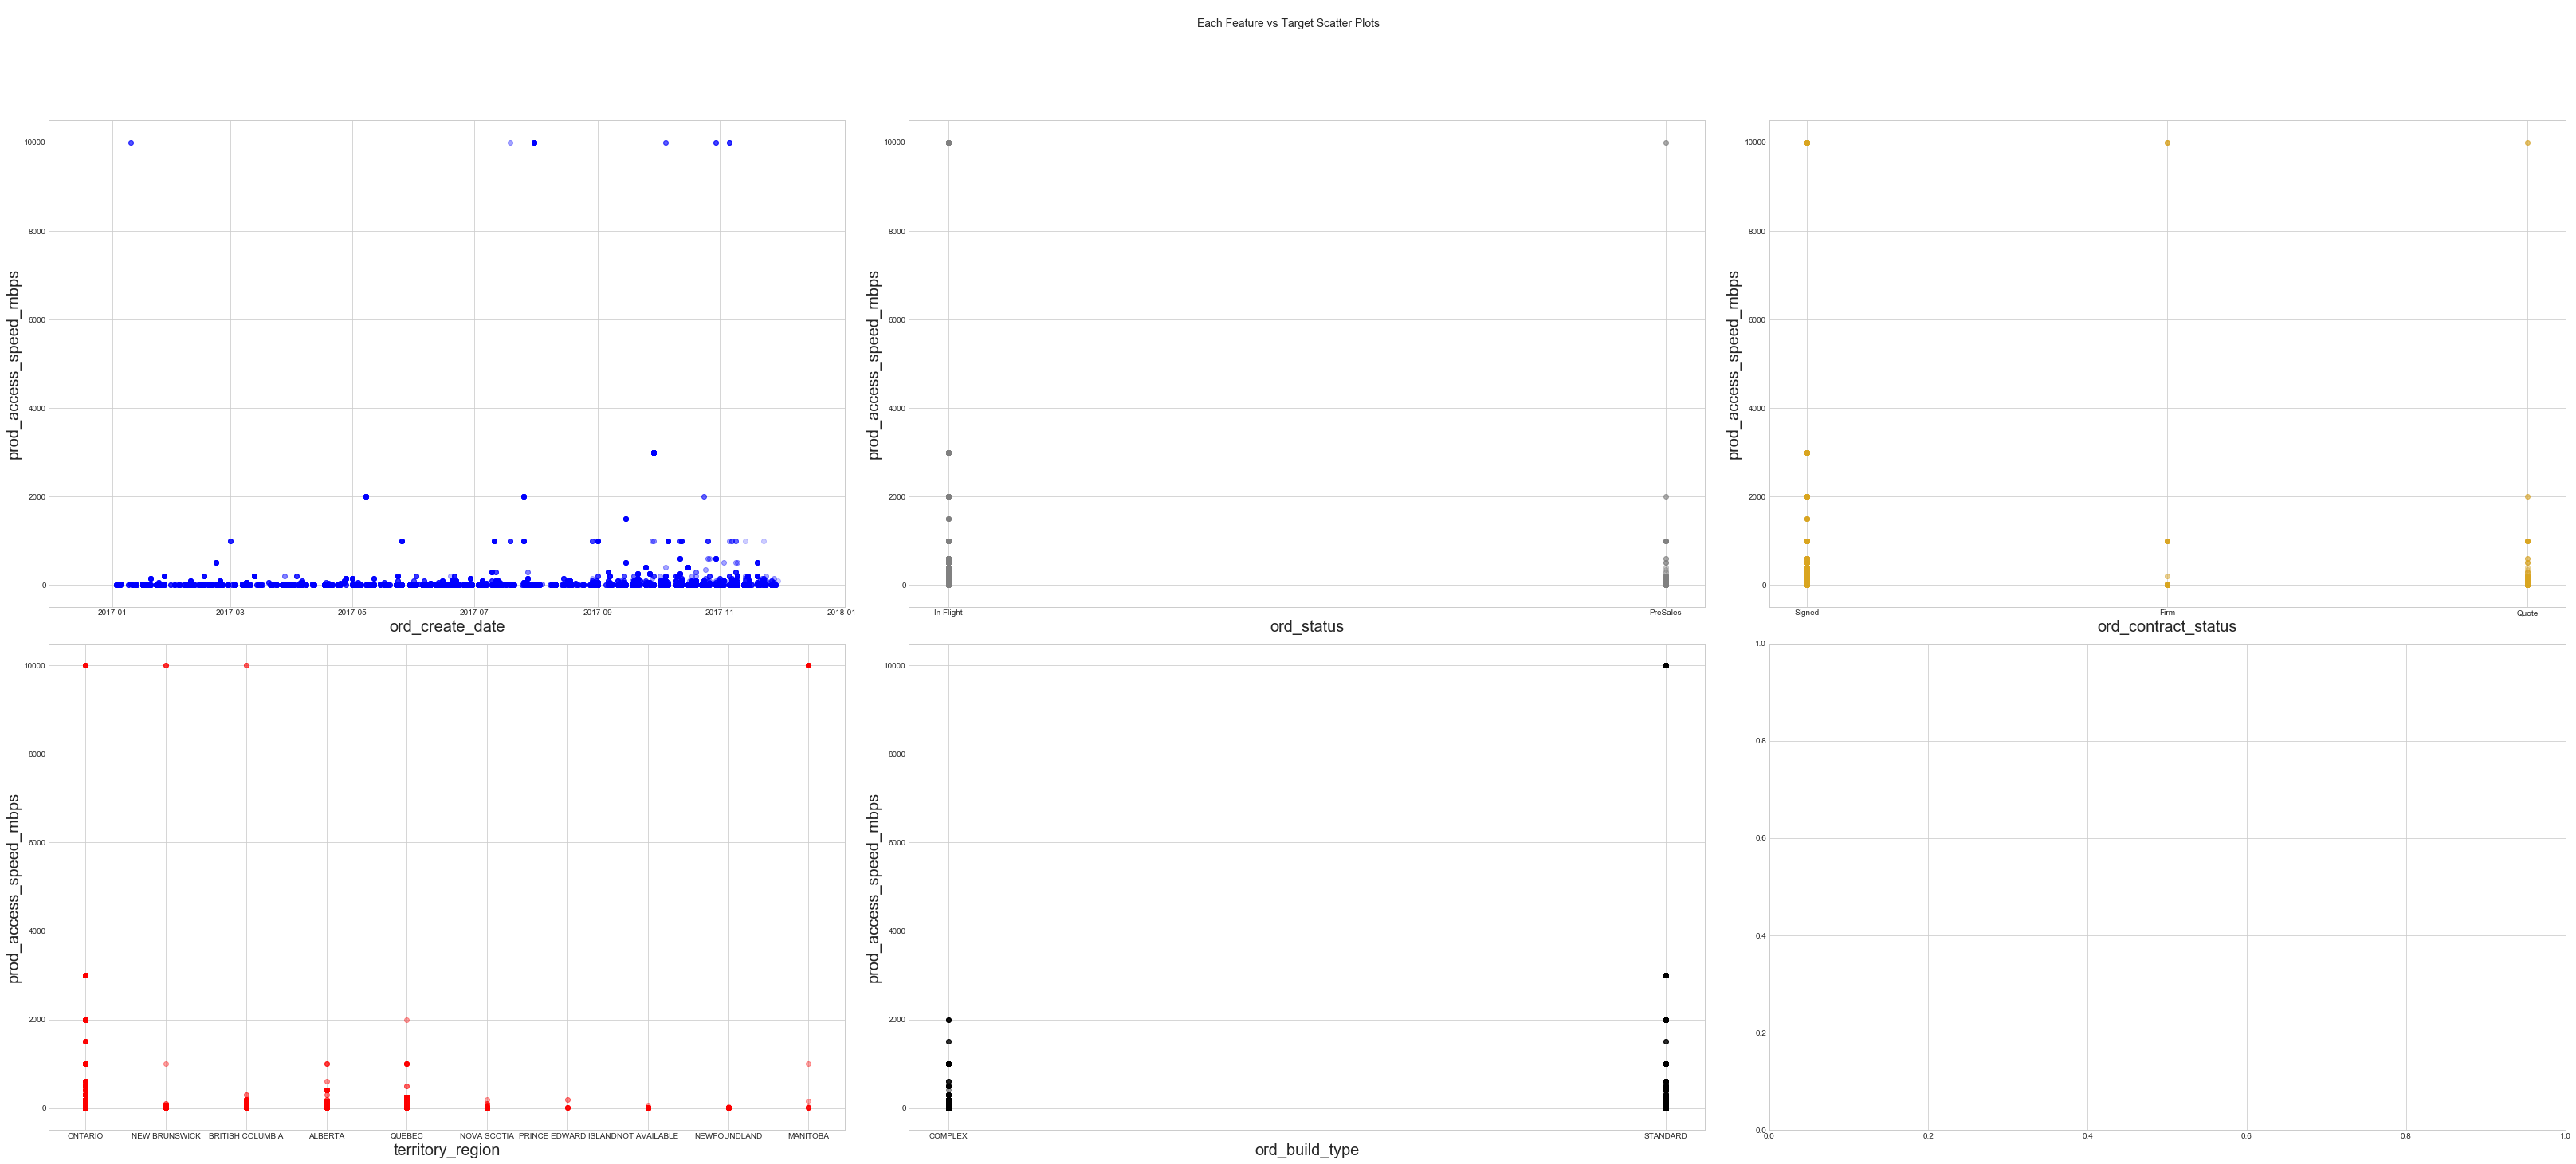

In [41]:

feature_cols = [col for col in new_df_bin.columns if col != 'prod_access_speed_mbps']
gen_scatterplots(dataframe, 'prod_access_speed_mbps',
                feature_cols,
                3,
                'speed_vs_features.jpg'
                )

# Target Feature : ord_fibe_status

In [42]:
dataframe.ord_fibe_status.value_counts()

TBD            22191
FTTB Bypass      264
FTTN              39
Name: ord_fibe_status, dtype: int64

In [43]:
new_df_bin['ord_fibe_status'] = dataframe['ord_fibe_status']

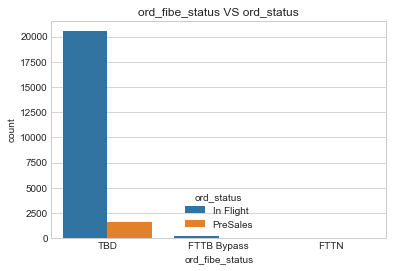

In [44]:
# ord_build_type VS ord_status
plt.title('ord_fibe_status VS ord_status')
sns.countplot(new_df_bin.ord_fibe_status, hue=new_df_bin['ord_status'])
plt.show()



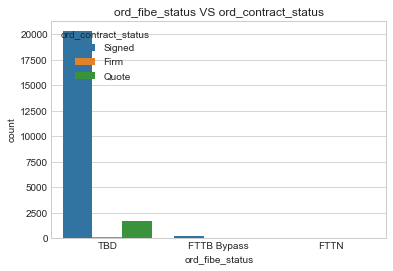

In [45]:
# ord_build_type VS ord_status
plt.title('ord_fibe_status VS ord_contract_status')
sns.countplot(new_df_bin.ord_fibe_status, hue=new_df_bin['ord_contract_status'])
plt.show()

# Target Feature : ord_proj_type

In [46]:
dataframe.ord_proj_type.value_counts()

NON PROJECT    11484
CE PROJECT      7674
DE PROJECT      3336
Name: ord_proj_type, dtype: int64

NON PROJECT    11484
CE PROJECT      7674
DE PROJECT      3336
Name: ord_proj_type, dtype: int64


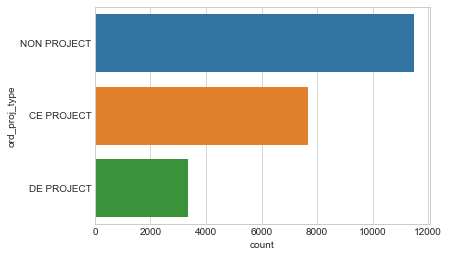

In [47]:
sns.countplot(y='ord_proj_type', data=dataframe);
print(dataframe.ord_proj_type.value_counts())

In [48]:
# add ord_build_type to new_df_bin
new_df_bin['ord_proj_type'] = dataframe['ord_proj_type']

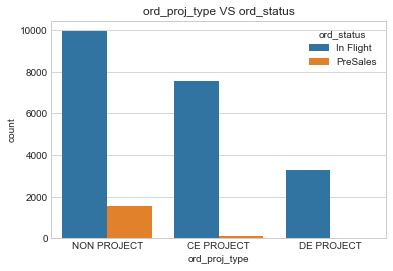

In [49]:
# ord_build_type VS ord_status
plt.title('ord_proj_type VS ord_status')
sns.countplot(new_df_bin.ord_proj_type, hue=new_df_bin['ord_status'])
plt.show()



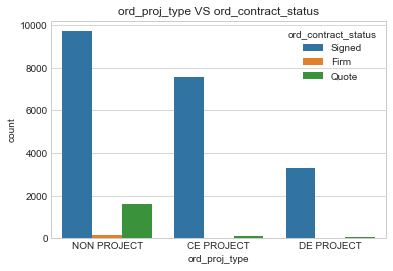

In [50]:
# ord_build_type VS ord_contract_status
plt.title('ord_proj_type VS ord_contract_status')
sns.countplot(new_df_bin.ord_proj_type, hue=new_df_bin['ord_contract_status'])
plt.show()

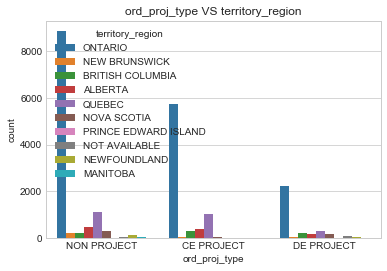

In [51]:
# ord_build_type VS ord_contract_status
plt.title('ord_proj_type VS territory_region')
sns.countplot(new_df_bin.ord_proj_type, hue=new_df_bin['territory_region'])
plt.show()

# Target Feature : postal_cd_clean


In [52]:
dataframe.postal_cd_clean.value_counts()

T2H 0K6    148
N1G3M5     108
L5N2V8      81
M9C5K8      79
N4Z1AZ      75
M4W1A3      73
L5N3K3      72
T4A 0R1     71
B3A 4T4     67
L6T5J8      66
K9J1Z9      64
M1W3E8      63
K0C1A0      63
H4N2T2      61
M6A2T9      61
A0K 4P0     59
K1X1A3      59
L4J1A1      56
H4R1X1      52
N3Y4M5      50
L6S6E6      50
L1V2R5      50
N5A2M4      49
N0B2R0      49
P3A2T4      49
N6N1E4      49
N0B2A0      49
K0A1M0      49
L6M3G3      48
N0G2L0      48
          ... 
TC 2C3       3
J6Y0J9       3
M6K3E7       3
N2E0A9       3
P5A2T1       3
A1C 2G2      3
P0K 1R0      3
L5N7L7       3
E0A1G0       3
C1A5Z5       3
M5V2B5       3
A1B2C7       3
L4L 1A5      3
N6B3L1       3
H1X1G4       3
V3K 3V9      3
E2L3G1       3
L0S1K0       3
A1C 5G2      3
L4Y1S2       3
J0P1H0       2
R3C3P1       2
H2V3E6       2
H2X3R7       2
R3B 2C3      2
H1V1K1       2
T2P4H2       2
H7G4R5       2
G0A 4K0      2
G7N 2A8      2
Name: postal_cd_clean, Length: 1494, dtype: int64

# TARGET FEATURE: task_type_or_reject_reason 

In [53]:
dataframe.task_type_or_reject_reason.value_counts()

Validate Customer Account                     1777
Network Identification                        1353
Network Discovery                             1338
Quote Completed                               1327
Presales Signed                               1299
Core Port Assignment                          1297
Pricing and Proposal                          1297
IPDP Required                                 1287
Build Access                                  1187
Site Visit Required                           1178
AEP TARS                                      1015
Contract Signed                               1007
Set NRD                                        996
PMG                                            987
Revision                                       913
Rejection due to Validate Customer Account     649
Rejection due to Pricing and Proposal          583
Schedule RID                                   268
Design and Build                               261
Configuration Templates        

In [54]:
new_df_bin['task_type_or_reject_reason'] = dataframe['task_type_or_reject_reason']

# Target Feature : task_current_status

In [55]:
dataframe.task_current_status.value_counts()

Completed       15389
Pending          2800
Required         2734
Not Required      967
Roadblocked       359
In Progress       222
Cancelled          23
Name: task_current_status, dtype: int64

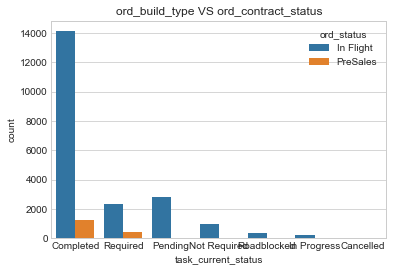

In [56]:
# ord_build_type VS ord_contract_status
plt.title('ord_build_type VS ord_contract_status')
sns.countplot(dataframe.task_current_status, hue=dataframe['ord_status'])
plt.show()

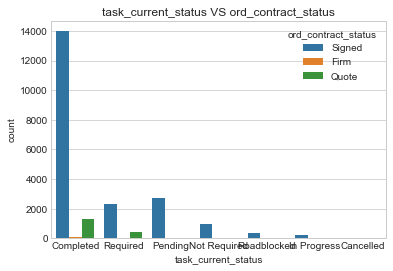

In [57]:
# ord_build_type VS ord_contract_status
plt.title('task_current_status VS ord_contract_status')
sns.countplot(dataframe.task_current_status, hue=dataframe['ord_contract_status'])
plt.show()

In [58]:
# add ord_build_type to new_df_bin
new_df_bin['task_current_status'] = dataframe['task_current_status']

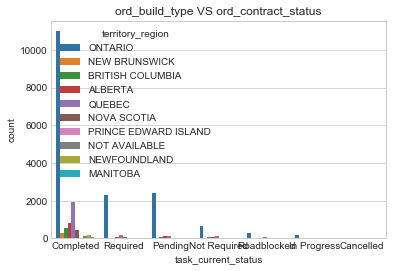

In [59]:
# ord_build_type VS ord_contract_status
plt.title('ord_build_type VS ord_contract_status')
sns.countplot(dataframe.task_current_status, hue=dataframe['territory_region'])
plt.show()

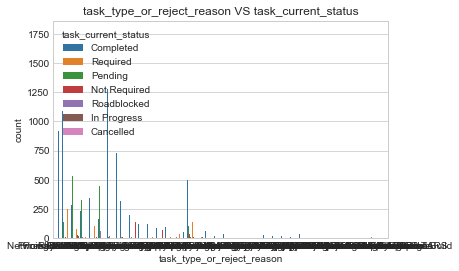

In [60]:
# ord_build_type VS ord_contract_status
plt.title('task_type_or_reject_reason VS task_current_status')
sns.countplot(new_df_bin.task_type_or_reject_reason, hue=new_df_bin['task_current_status'])
plt.show()

# Target Feature : task_create_date & ord_create_date

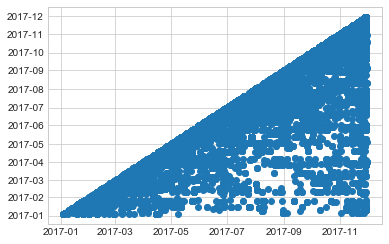

In [61]:

new_df_bin['task_create_date'] = dataframe['task_create_date']
new_df_bin['ord_create_date'] = dataframe['ord_create_date']
plt.plot_date(x=new_df_bin.loc[:,'task_create_date'], y=new_df_bin.loc[:,'ord_create_date'])
plt.show()


# Target Feature : Task_compl_date
## Presence of 7000 '?'

In [62]:
# not useful - a lot of missing values
dataframe.task_compl_date.value_counts()

?                      6986
2017-11-28 00:00:00     343
2017-11-29 00:00:00     300
2017-11-30 00:00:00     290
2017-11-27 00:00:00     267
2017-11-23 00:00:00     251
2017-11-22 00:00:00     245
2017-11-06 00:00:00     218
2017-11-21 00:00:00     214
2017-10-31 00:00:00     206
2017-11-02 00:00:00     202
2017-11-16 00:00:00     191
2017-11-15 00:00:00     187
2017-11-24 00:00:00     183
2017-11-09 00:00:00     176
2017-11-01 00:00:00     175
2017-11-03 00:00:00     174
2017-11-14 00:00:00     172
2017-11-20 00:00:00     169
2017-10-27 00:00:00     168
2017-11-10 00:00:00     166
2017-11-17 00:00:00     162
2017-10-12 00:00:00     162
2017-10-18 00:00:00     161
2017-10-03 00:00:00     159
2017-10-30 00:00:00     158
2017-11-13 00:00:00     158
2017-11-07 00:00:00     156
2017-10-05 00:00:00     147
2017-07-04 00:00:00     143
                       ... 
2017-02-26 00:00:00       2
2017-11-25 00:00:00       2
2017-01-13 00:00:00       2
2017-11-19 00:00:00       2
2017-10-15 00:00:00 

# Target Feature : task_age_bus_days

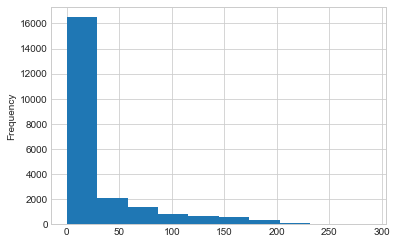

In [63]:
dataframe.task_age_bus_days.plot.hist()


In [64]:
dataframe.task_age_bus_days.mean()

27.28349693251644

In [65]:
new_df_bin['task_age_bus_days'] = dataframe['task_age_bus_days']

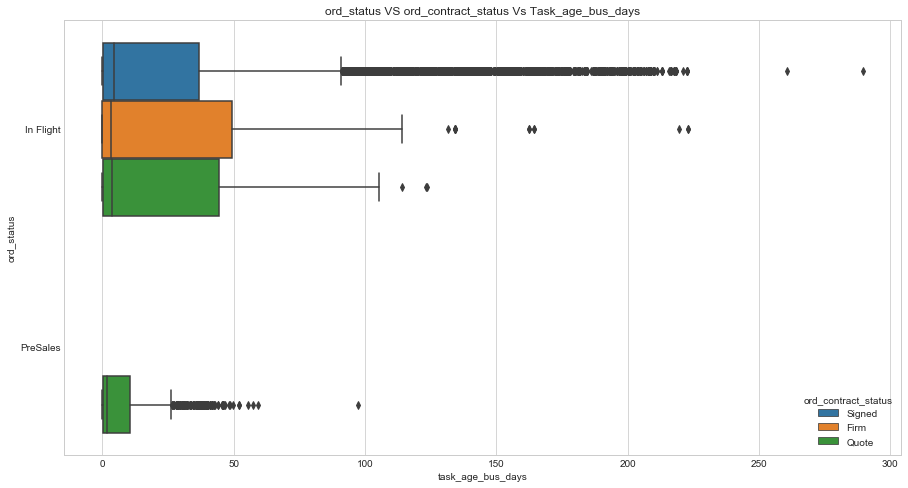

In [66]:
# Creating a box plot  
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='task_age_bus_days', y='ord_status', hue='ord_contract_status', data=dataframe, ax=ax)  
ax.set_title('ord_status VS ord_contract_status Vs Task_age_bus_days')  
plt.show() 

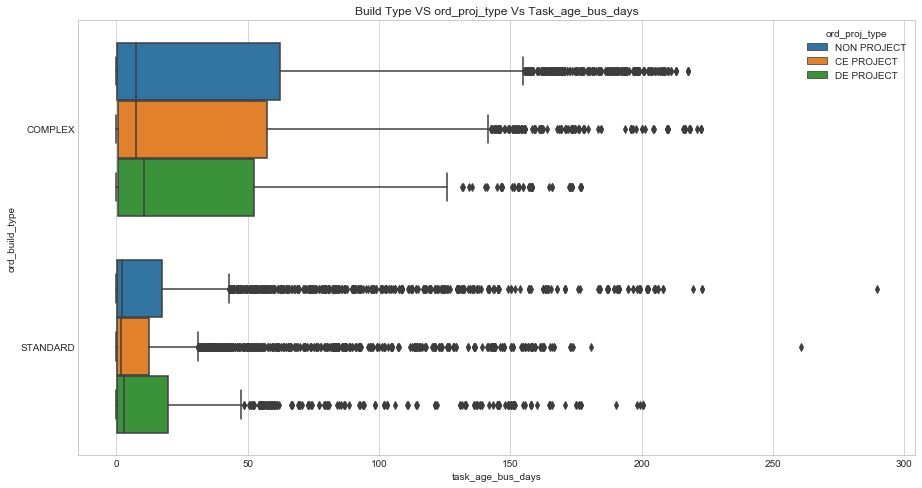

In [67]:
# Creating a box plot  
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='task_age_bus_days', y='ord_build_type', hue='ord_proj_type', data=dataframe, ax=ax)  
ax.set_title('Build Type VS ord_proj_type Vs Task_age_bus_days')  
plt.show() 

# Check the distribution of task_age_bus_days according to the features below
- ord_create_date
- ord_status
- ord_contract_status
- territory_region
- prod_access_speed_mbps
- ord_fibe_status
- ord_build_type
- ord_proj_type
- ord_type_or_reject_reason
- task_current_status
- task_create_date

In [68]:
new_df_bin.head()

,ord_create_date,ord_status,ord_contract_status,territory_region,ord_build_type,prod_access_speed_mbps,ord_fibe_status,ord_proj_type,task_type_or_reject_reason,task_current_status,task_create_date,task_age_bus_days
14816,2017-01-03,In Flight,Signed,ONTARIO,COMPLEX,10.0,TBD,NON PROJECT,Network Identification,Completed,2017-01-03,16.10
18305,2017-01-03,In Flight,Signed,ONTARIO,COMPLEX,10.0,TBD,NON PROJECT,Presales Signed,Completed,2017-01-25,0.01
12803,2017-01-03,In Flight,Signed,ONTARIO,COMPLEX,10.0,TBD,NON PROJECT,Pricing and Proposal,Completed,2017-02-28,0.19
12804,2017-01-03,In Flight,Signed,ONTARIO,COMPLEX,10.0,TBD,NON PROJECT,Set NRD,Required,2017-02-28,190.19
12805,2017-01-03,In Flight,Signed,ONTARIO,COMPLEX,10.0,TBD,NON PROJECT,PMG,Completed,2017-02-28,71.76


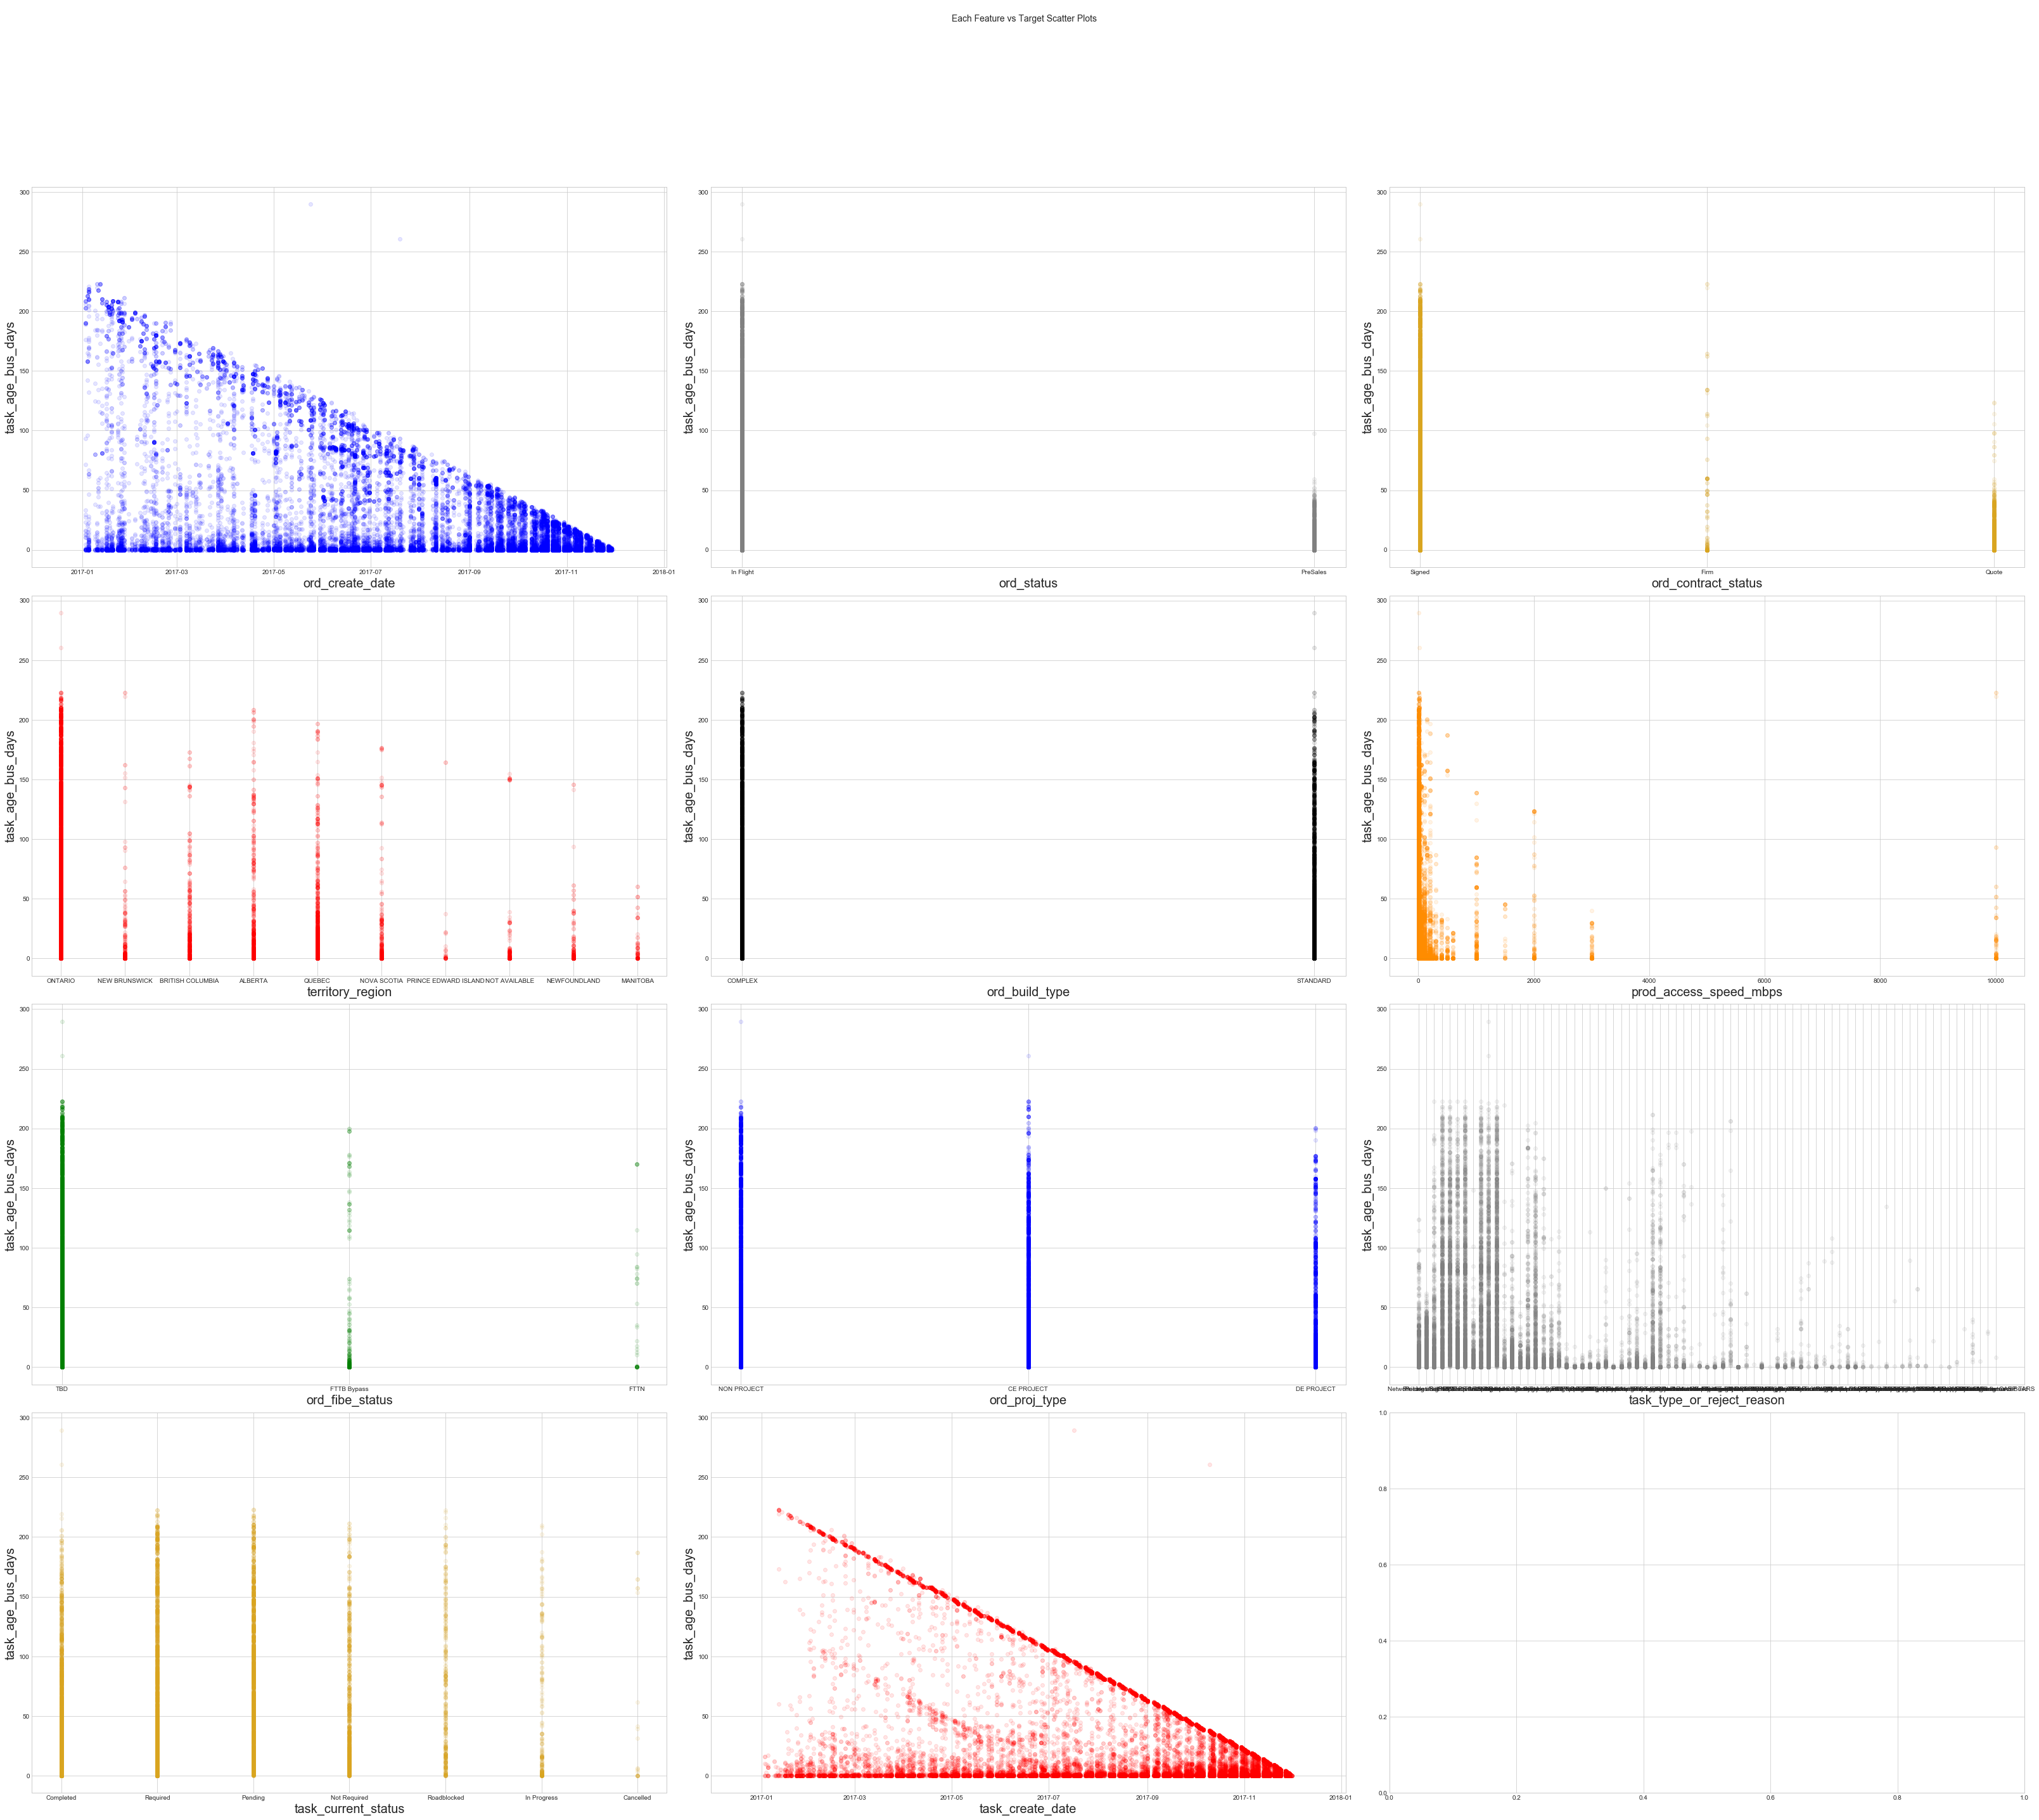

In [69]:

feature_cols = [col for col in new_df_bin.columns if col != 'task_age_bus_days']
gen_scatterplots(new_df_bin, 'task_age_bus_days',
                feature_cols,
                3,
                'Task-AGE-BUS-DAYS-VS-FEATURES.jpg'
                )

# Explore tasks taking time more than required

In [70]:
dataframe.task_age_bus_days.median()

3.91

In [71]:
new_df_1 = pd.DataFrame()
new_df_1 = dataframe[dataframe.task_age_bus_days > dataframe.task_age_bus_days.median()]
new_df_1.head()

,ord_num,ord_create_date,ord_status,ord_contract_status,territory_region,prod_access_speed_mbps,ord_fibe_status,ord_build_type,ord_proj_type,cust_id,postal_cd_clean,task_type_or_reject_reason,task_reject_reason,task_last_roadblock,task_current_status,task_create_date,task_compl_date,task_age_bus_days,task_age_cal_days
14816,14346_691-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L6M0N2,Network Identification,NaN,NaN,Completed,2017-01-03,2017-01-25 00:00:00,16.10,22
12804,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,Set NRD,NaN,Waiting for Site Visit to Complete,Required,2017-02-28,?,190.19,?
12805,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,PMG,NaN,Waiting FDWS,Completed,2017-02-28,2017-06-08 00:00:00,71.76,100
12806,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,IPDP Required,NaN,NaN,Completed,2017-02-28,2017-03-20 00:00:00,13.23,20
12807,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,AEP TARS,NaN,Awaiting Site Visit Completion,Completed,2017-02-28,2017-07-10 00:00:00,93.53,132


### Now after viewing task_age_bus_days values, we found that there is a lot  '?', let's start with values not equal to"?'



In [72]:
late_compl = new_df_1[new_df_1.task_compl_date != '?']
late_compl

,ord_num,ord_create_date,ord_status,ord_contract_status,territory_region,prod_access_speed_mbps,ord_fibe_status,ord_build_type,ord_proj_type,cust_id,postal_cd_clean,task_type_or_reject_reason,task_reject_reason,task_last_roadblock,task_current_status,task_create_date,task_compl_date,task_age_bus_days,task_age_cal_days
14816,14346_691-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L6M0N2,Network Identification,NaN,NaN,Completed,2017-01-03,2017-01-25 00:00:00,16.10,22
12805,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,PMG,NaN,Waiting FDWS,Completed,2017-02-28,2017-06-08 00:00:00,71.76,100
12806,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,IPDP Required,NaN,NaN,Completed,2017-02-28,2017-03-20 00:00:00,13.23,20
12807,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,AEP TARS,NaN,Awaiting Site Visit Completion,Completed,2017-02-28,2017-07-10 00:00:00,93.53,132
18307,17876_507-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L8W3M2,Site Visit Required,NaN,Completed Rejection,Completed,2017-02-01,2017-10-24 00:00:00,189.11,265
18312,17876_507-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L8W3M2,PMG,NaN,Waiting FDWS,Completed,2017-02-01,2017-11-16 00:00:00,205.68,288
18306,17876_507-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L8W3M2,Network Discovery,NaN,NaN,Completed,2017-01-25,2017-02-01 00:00:00,4.60,7
18303,17876_507-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L8W3M2,Network Identification,NaN,NaN,Completed,2017-01-03,2017-01-25 00:00:00,15.72,22
14819,14346_691-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L6M0N2,Network Discovery,NaN,NaN,Completed,2017-01-25,2017-02-09 00:00:00,10.55,15
14820,14346_691-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L6M0N2,Site Visit Required,NaN,Right of Way/Locates,Completed,2017-02-09,2017-11-02 00:00:00,189.75,266


Completed       4826
Roadblocked       25
Pending           22
Required          14
Not Required       3
In Progress        3
Cancelled          3
Name: task_current_status, dtype: int64


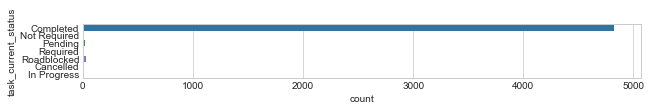

In [73]:
fig = plt.figure(figsize=(10,1))
sns.countplot(y='task_current_status', data=late_compl);
print(late_compl.task_current_status.value_counts()) # view the top frequent status, Majority Completed

In [74]:
late_compl.task_current_status.value_counts() # view the top frequent status, no absence of completed

Completed       4826
Roadblocked       25
Pending           22
Required          14
Not Required       3
In Progress        3
Cancelled          3
Name: task_current_status, dtype: int64

In [75]:
late_compl = late_compl[['task_type_or_reject_reason','task_reject_reason','task_last_roadblock','task_age_bus_days']]

late_compl

,task_type_or_reject_reason,task_reject_reason,task_last_roadblock,task_age_bus_days
14816,Network Identification,NaN,NaN,16.10
12805,PMG,NaN,Waiting FDWS,71.76
12806,IPDP Required,NaN,NaN,13.23
12807,AEP TARS,NaN,Awaiting Site Visit Completion,93.53
18307,Site Visit Required,NaN,Completed Rejection,189.11
18312,PMG,NaN,Waiting FDWS,205.68
18306,Network Discovery,NaN,NaN,4.60
18303,Network Identification,NaN,NaN,15.72
14819,Network Discovery,NaN,NaN,10.55
14820,Site Visit Required,NaN,Right of Way/Locates,189.75


In [76]:
late_compl.task_type_or_reject_reason.value_counts()


Network Identification                        823
Network Discovery                             623
Site Visit Required                           462
IPDP Required                                 347
PMG                                           279
Set NRD                                       249
Pricing and Proposal                          237
Rejection due to Pricing and Proposal         196
AEP TARS                                      195
Build Access                                  179
Presales Signed                               176
Contract Signed                               174
Quote Completed                               171
Rejection due to Validate Customer Account    160
Validate Customer Account                     115
Configuration Templates                        90
Schedule RID                                   76
Solution Design                                63
Core Port Assignment                           57
Revision                                       56


In [77]:
late_compl.task_reject_reason.value_counts()  # view the top frequent reject reasons

SV - CUSTOMER CONDUIT REQUIRED                              118
CUSTOMER CONDUIT ISSUE                                       38
Other                                                        35
SV - CUSTOMER SUB DUCT ISSUE                                 30
SITE CONTACT ISSUE                                           26
ORDER DETAILS/COMMENTS ISSUE                                 25
FEATURES UPDATED                                             21
ADDRESS ISSUE                                                20
DIVERSITY ISSUE                                              17
SV - CUSTOMER TO PROVIDE NEW RACK/POWER                      15
SV - CUSTOMER NOT AVAILABLE 2ND ATTEMPT                      12
SV - SITE CONTACT UNAWARE OF SERVICE                         11
RID UPDATED                                                  10
SV - SITE NOT READY/UNDER CONSTRUCTION                       10
PACKAGE/ACCESS SPEED UPDATED                                  8
CONTRACT STATUS ISSUE                   

In [78]:
late_compl.task_last_roadblock.value_counts() # view the top frequent roadblocks

Awaiting Site Visit Completion                        457
Completed Rejection                                   330
Waiting on Sales/PM Response                          315
Waiting on IPDP/SOW                                   240
Waiting FDWS                                          221
Waiting Network Management                            212
Waiting for Site Visit to Complete                    188
Waiting on Customer Response                          158
Waiting on IM/IC to set RID                            98
Waiting Completion of PMG Task                         93
Waiting on CSE Response                                93
Rejection                                              69
Waiting for Conditioning                               58
Waiting for other task to be completed                 56
Right of Way/Locates                                   51
This Order has Been Revised                            48
Waiting for additional info (see task comments)        47
Waiting for Bu

Network Identification                        823
Network Discovery                             623
Site Visit Required                           462
IPDP Required                                 347
PMG                                           279
Set NRD                                       249
Pricing and Proposal                          237
Rejection due to Pricing and Proposal         196
AEP TARS                                      195
Build Access                                  179
Presales Signed                               176
Contract Signed                               174
Quote Completed                               171
Rejection due to Validate Customer Account    160
Validate Customer Account                     115
Configuration Templates                        90
Schedule RID                                   76
Solution Design                                63
Core Port Assignment                           57
Revision                                       56


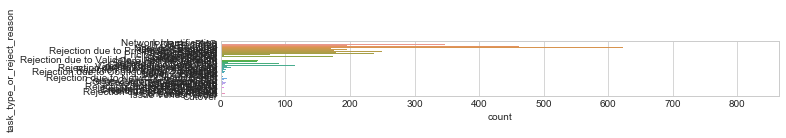

In [79]:
fig = plt.figure(figsize=(10,1))
sns.countplot(y='task_type_or_reject_reason', data=late_compl);
print(late_compl.task_type_or_reject_reason.value_counts()) 

SV - CUSTOMER CONDUIT REQUIRED                              118
CUSTOMER CONDUIT ISSUE                                       38
Other                                                        35
SV - CUSTOMER SUB DUCT ISSUE                                 30
SITE CONTACT ISSUE                                           26
ORDER DETAILS/COMMENTS ISSUE                                 25
FEATURES UPDATED                                             21
ADDRESS ISSUE                                                20
DIVERSITY ISSUE                                              17
SV - CUSTOMER TO PROVIDE NEW RACK/POWER                      15
SV - CUSTOMER NOT AVAILABLE 2ND ATTEMPT                      12
SV - SITE CONTACT UNAWARE OF SERVICE                         11
RID UPDATED                                                  10
SV - SITE NOT READY/UNDER CONSTRUCTION                       10
PACKAGE/ACCESS SPEED UPDATED                                  8
CONTRACT STATUS ISSUE                   

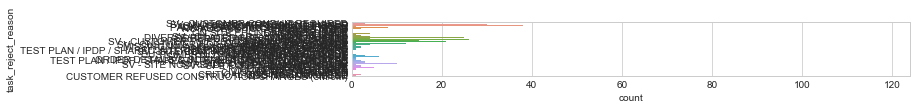

In [80]:
fig = plt.figure(figsize=(10,1))
sns.countplot(y='task_reject_reason', data=late_compl);
print(late_compl.task_reject_reason.value_counts())

SV - CUSTOMER CONDUIT REQUIRED                              118
CUSTOMER CONDUIT ISSUE                                       38
Other                                                        35
SV - CUSTOMER SUB DUCT ISSUE                                 30
SITE CONTACT ISSUE                                           26
ORDER DETAILS/COMMENTS ISSUE                                 25
FEATURES UPDATED                                             21
ADDRESS ISSUE                                                20
DIVERSITY ISSUE                                              17
SV - CUSTOMER TO PROVIDE NEW RACK/POWER                      15
SV - CUSTOMER NOT AVAILABLE 2ND ATTEMPT                      12
SV - SITE CONTACT UNAWARE OF SERVICE                         11
RID UPDATED                                                  10
SV - SITE NOT READY/UNDER CONSTRUCTION                       10
PACKAGE/ACCESS SPEED UPDATED                                  8
CONTRACT STATUS ISSUE                   

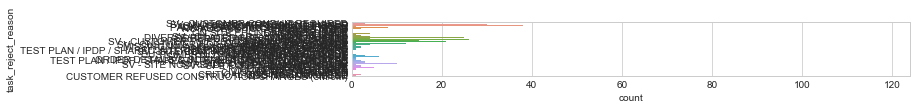

In [81]:
fig = plt.figure(figsize=(10,1))
sns.countplot(y='task_reject_reason', data=late_compl);
print(late_compl.task_reject_reason.value_counts())

In [82]:
percentage(late_compl.task_type_or_reject_reason)


,counts,per,per100
Network Identification,823,0.168096,16.8%
Network Discovery,623,0.127247,12.7%
Site Visit Required,462,0.094363,9.4%
IPDP Required,347,0.070874,7.1%
PMG,279,0.056985,5.7%
Set NRD,249,0.050858,5.1%
Pricing and Proposal,237,0.048407,4.8%
Rejection due to Pricing and Proposal,196,0.040033,4.0%
AEP TARS,195,0.039828,4.0%
Build Access,179,0.036560,3.7%


In [83]:
percentage(late_compl.task_reject_reason)


,counts,per,per100
SV - CUSTOMER CONDUIT REQUIRED,118,0.244813,24.5%
CUSTOMER CONDUIT ISSUE,38,0.078838,7.9%
Other,35,0.072614,7.3%
SV - CUSTOMER SUB DUCT ISSUE,30,0.062241,6.2%
SITE CONTACT ISSUE,26,0.053942,5.4%
ORDER DETAILS/COMMENTS ISSUE,25,0.051867,5.2%
FEATURES UPDATED,21,0.043568,4.4%
ADDRESS ISSUE,20,0.041494,4.1%
DIVERSITY ISSUE,17,0.035270,3.5%
SV - CUSTOMER TO PROVIDE NEW RACK/POWER,15,0.031120,3.1%


In [84]:
percentage(late_compl.task_last_roadblock)

,counts,per,per100
Awaiting Site Visit Completion,457,0.152843,15.3%
Completed Rejection,330,0.110368,11.0%
Waiting on Sales/PM Response,315,0.105351,10.5%
Waiting on IPDP/SOW,240,0.080268,8.0%
Waiting FDWS,221,0.073913,7.4%
Waiting Network Management,212,0.070903,7.1%
Waiting for Site Visit to Complete,188,0.062876,6.3%
Waiting on Customer Response,158,0.052843,5.3%
Waiting on IM/IC to set RID,98,0.032776,3.3%
Waiting Completion of PMG Task,93,0.031104,3.1%


In [85]:
late_compl["task_reject_reason"].fillna("Unknown", inplace = True)
late_compl["task_last_roadblock"].fillna("Unknown", inplace = True)

In [86]:
late_compl = late_compl.groupby(['task_type_or_reject_reason','task_last_roadblock','task_reject_reason']).task_type_or_reject_reason.value_counts().to_frame()
late_compl

task_type_or_reject_reason
task_type_or_reject_reason task_last_roadblock                             task_reject_reason         task_type_or_reject_reason                            
AEP TARS                   Awaiting Site Visit Completion                  Unknown                    AEP TARS                                           192
                           Completed Rejection                             Unknown                    AEP TARS                                             1
                           Waiting for additional info (see task comments) Unknown                    AEP TARS                                             1
                           Waiting on Customer Response                    Unknown                    AEP TARS                                             1
Assign                     Fiber Issues                                    Unknown                    Assign                                               1
                           ISR issued - Waiting for Fiber Planning         Unknown                    Assign                                               9
                           Waiting for Build Complete                      Unknown                    Assign                                               2
                           Waiting for Contract Signature                  Unknown                    Assign                                               1
                           Waiting on Customer Response                    Unknown                    Assign                                               2
Build Access               Awaiting Site Visit Completion                  Unknown                    Build Access                                         3
                           Completed Rejection                             Unknown                    Build Access                                        30
                           Rejection                                       ACCESS SPEED ISSUE         Build Access                                         1
                                                                           CUSTOMER CONDUIT ISSUE     Build Access                                         4
                                                                           ON SITE PHONE NUMBER ISSUE Build Access                                         1
                                                                           SITE CONTACT ISSUE         Build Access                                         1
                           Right of Way/Locates                            Unknown                    Build Access                                         1
                           Unknown                                         Unknown                    Build Access                                        27
                           Waiting Completion of PMG Task                  CUSTOMER CONDUIT ISSUE     Build Access                                         1
                                                                           Unknown                    Build Access                                        91
                           Waiting for Build Complete                      Unknown                    Build Access                                        18
                           Waiting for other task to be completed          Unknown                    Build Access                                         1
Configuration Templates    Completed Rejection                             Unknown                    Configuration Templates                             16
                           Unknown                                         Unknown                    Configuration Templates                             72
                           Waiting on CSE Response                         Unknown                    Configuration Templates                              2
Contract Signed            Unknown              

In [87]:
late_compl = late_compl[late_compl.task_type_or_reject_reason > late_compl.task_type_or_reject_reason.mean()]
late_compl

task_type_or_reject_reason
task_type_or_reject_reason                 task_last_roadblock                                task_reject_reason             task_type_or_reject_reason                                            
AEP TARS                                   Awaiting Site Visit Completion                     Unknown                        AEP TARS                                                           192
Build Access                               Completed Rejection                                Unknown                        Build Access                                                        30
                                           Unknown                                            Unknown                        Build Access                                                        27
                                           Waiting Completion of PMG Task                     Unknown                        Build Access                                                        91
                                           Waiting for Build Complete                         Unknown                        Build Access                                                        18
Configuration Templates                    Completed Rejection                                Unknown                        Configuration Templates                                             16
                                           Unknown                                            Unknown                        Configuration Templates                                             72
Contract Signed                            Unknown                                            Unknown                        Contract Signed                                                    174
Core Port Assignment                       Unknown                                            Unknown                        Core Port Assignment                                                36
IPDP Required                              Unknown                                            Unknown                        IPDP Required                                                       90
                                           Waiting on CSE Response                            Unknown                        IPDP Required                                                       43
                                           Waiting on IPDP/SOW                                Unknown                        IPDP Required                                                      188
Network Discovery                          Awaiting Site Visit Completion                     Unknown                        Network Discovery                                                   43
                                           Completed Rejection                                Unknown                        Network Discovery                                                   87
                                           Unknown                                            Unknown                        Network Discovery                                                  383
                                           Waiting Network Management                         Unknown                        Network Discovery                                                   54
                                           Waiting for Conditioning                           Unknown                        Network Discovery                                                   19
Network Identification                     Completed Rejection                                Unknown                        Network Identification                                              67
                                           Unknown                                            Unknown                        Network Identification                                             526
                                           Waiting Ne

In [88]:
late_compl.to_excel("Completedorders_vs_reasons.xlsx")

### let's work on values equal to"?'



In [89]:
not_compl = new_df_1[new_df_1.task_compl_date == '?']
not_compl.head()

,ord_num,ord_create_date,ord_status,ord_contract_status,territory_region,prod_access_speed_mbps,ord_fibe_status,ord_build_type,ord_proj_type,cust_id,postal_cd_clean,task_type_or_reject_reason,task_reject_reason,task_last_roadblock,task_current_status,task_create_date,task_compl_date,task_age_bus_days,task_age_cal_days
12804,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,Set NRD,NaN,Waiting for Site Visit to Complete,Required,2017-02-28,?,190.19,?
12808,12490_356-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L4L1A7,Contract Signed,NaN,NaN,Required,2017-03-01,?,190.00,?
18308,17876_507-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L8W3M2,Build Access,NaN,Waiting Completion of PMG Task,Required,2017-02-01,?,208.68,?
18311,17876_507-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L8W3M2,Set NRD,NaN,Right of Way/Locates,Pending,2017-02-01,?,208.68,?
14821,14346_691-I001,2017-01-03,In Flight,Signed,ONTARIO,10.0,TBD,COMPLEX,NON PROJECT,22241,L6M0N2,Build Access,NaN,Waiting Completion of PMG Task,Required,2017-02-09,?,202.73,?


Pending         2601
Required        2445
Not Required     834
Roadblocked      307
In Progress      152
Cancelled         11
Name: task_current_status, dtype: int64


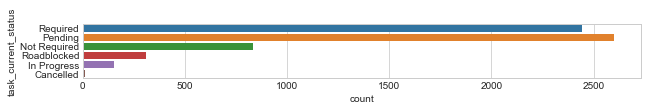

In [90]:
fig = plt.figure(figsize=(10,1))
sns.countplot(y='task_current_status', data=not_compl);
print(not_compl.task_current_status.value_counts()) # view the top frequent status, no absence of completed

Build Access                                  971
AEP TARS                                      752
Set NRD                                       679
PMG                                           672
Contract Signed                               637
Site Visit Required                           436
IPDP Required                                 370
Presales Signed                               357
Rejection due to Pricing and Proposal         245
Pricing and Proposal                          187
Revision                                      163
Design and Build                              157
Rejection due to Validate Customer Account    137
System - 2 Do Not Touch                       104
Schedule RID                                   62
Issue Vendor Order BitW                        46
Turn Up Service                                41
Stage Routers                                  37
Configuration Templates                        29
Network Discovery                              27


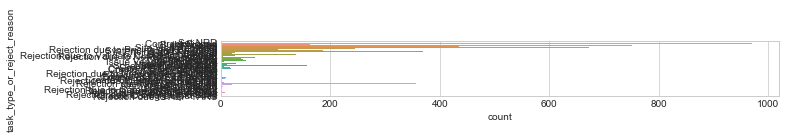

In [91]:
fig = plt.figure(figsize=(10,1))
sns.countplot(y='task_type_or_reject_reason', data=not_compl);
print(not_compl.task_type_or_reject_reason.value_counts()) 

SV - CUSTOMER CONDUIT REQUIRED                              229
CUSTOMER CONDUIT ISSUE                                       91
Other                                                        83
SV - CUSTOMER SUB DUCT ISSUE                                 71
FEATURES UPDATED                                             66
ORDER DETAILS/COMMENTS ISSUE                                 25
SV - SITE NOT READY/UNDER CONSTRUCTION                       24
SV - CUSTOMER NOT AVAILABLE 2ND ATTEMPT                      22
RID UPDATED                                                  19
SITE CONTACT ISSUE                                           18
PACKAGE/ACCESS SPEED UPDATED                                 18
CUSTOMER NOT READY                                           17
DIVERSITY ISSUE                                              13
ROOM/FLOOR UPDATED                                           12
CONTRACT STATUS ISSUE                                        11
IPDP MISSING                            

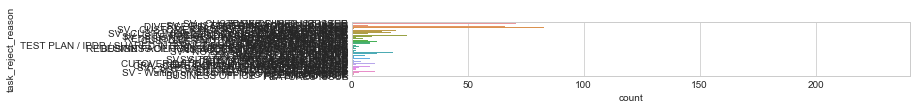

In [92]:
fig = plt.figure(figsize=(10,1))
sns.countplot(y='task_reject_reason', data=not_compl);
print(not_compl.task_reject_reason.value_counts())

SV - CUSTOMER CONDUIT REQUIRED                              229
CUSTOMER CONDUIT ISSUE                                       91
Other                                                        83
SV - CUSTOMER SUB DUCT ISSUE                                 71
FEATURES UPDATED                                             66
ORDER DETAILS/COMMENTS ISSUE                                 25
SV - SITE NOT READY/UNDER CONSTRUCTION                       24
SV - CUSTOMER NOT AVAILABLE 2ND ATTEMPT                      22
RID UPDATED                                                  19
SITE CONTACT ISSUE                                           18
PACKAGE/ACCESS SPEED UPDATED                                 18
CUSTOMER NOT READY                                           17
DIVERSITY ISSUE                                              13
ROOM/FLOOR UPDATED                                           12
CONTRACT STATUS ISSUE                                        11
IPDP MISSING                            

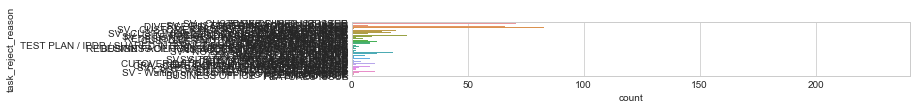

In [93]:
fig = plt.figure(figsize=(10,1))
sns.countplot(y='task_reject_reason', data=not_compl);
print(not_compl.task_reject_reason.value_counts())

In [94]:
percentage(not_compl.task_type_or_reject_reason)


,counts,per,per100
Build Access,971,0.152913,15.3%
AEP TARS,752,0.118425,11.8%
Set NRD,679,0.106929,10.7%
PMG,672,0.105827,10.6%
Contract Signed,637,0.100315,10.0%
Site Visit Required,436,0.068661,6.9%
IPDP Required,370,0.058268,5.8%
Presales Signed,357,0.056220,5.6%
Rejection due to Pricing and Proposal,245,0.038583,3.9%
Pricing and Proposal,187,0.029449,2.9%


In [95]:
percentage(not_compl.task_reject_reason)


,counts,per,per100
SV - CUSTOMER CONDUIT REQUIRED,229,0.253039,25.3%
CUSTOMER CONDUIT ISSUE,91,0.100552,10.1%
Other,83,0.091713,9.2%
SV - CUSTOMER SUB DUCT ISSUE,71,0.078453,7.8%
FEATURES UPDATED,66,0.072928,7.3%
ORDER DETAILS/COMMENTS ISSUE,25,0.027624,2.8%
SV - SITE NOT READY/UNDER CONSTRUCTION,24,0.026519,2.7%
SV - CUSTOMER NOT AVAILABLE 2ND ATTEMPT,22,0.024309,2.4%
RID UPDATED,19,0.020994,2.1%
SITE CONTACT ISSUE,18,0.019890,2.0%


In [96]:
percentage(not_compl.task_last_roadblock)

,counts,per,per100
Awaiting Site Visit Completion,883,0.202198,20.2%
Waiting Completion of PMG Task,569,0.130295,13.0%
Waiting FDWS,510,0.116785,11.7%
Waiting for Site Visit to Complete,505,0.115640,11.6%
Rejection,398,0.091138,9.1%
Waiting on Sales/PM Response,253,0.057935,5.8%
Waiting on IPDP/SOW,222,0.050836,5.1%
Waiting on Customer Response,171,0.039157,3.9%
This Order has Been Revised,163,0.037325,3.7%
Right of Way/Locates,126,0.028853,2.9%


In [97]:
not_compl = not_compl[['task_type_or_reject_reason','task_reject_reason','task_last_roadblock','task_age_bus_days']]
not_compl

,task_type_or_reject_reason,task_reject_reason,task_last_roadblock,task_age_bus_days
12804,Set NRD,NaN,Waiting for Site Visit to Complete,190.19
12808,Contract Signed,NaN,NaN,190.00
18308,Build Access,NaN,Waiting Completion of PMG Task,208.68
18311,Set NRD,NaN,Right of Way/Locates,208.68
14821,Build Access,NaN,Waiting Completion of PMG Task,202.73
14824,Set NRD,NaN,Right of Way/Locates,202.73
14829,Revision,FLEX CE INFO UPDATED,This Order has Been Revised,190.26
14828,Contract Signed,NaN,NaN,202.53
14827,AEP TARS,NaN,Awaiting Site Visit Completion,202.73
12801,Build Access,NaN,Waiting Completion of PMG Task,190.19


In [98]:
not_compl["task_reject_reason"].fillna("Unknown", inplace = True)
not_compl["task_last_roadblock"].fillna("Unknown", inplace = True)

In [99]:
not_compl_2 = not_compl.groupby(['task_type_or_reject_reason','task_reject_reason','task_last_roadblock']).task_type_or_reject_reason.value_counts().to_frame()
not_compl_2

task_type_or_reject_reason
task_type_or_reject_reason task_reject_reason                         task_last_roadblock                                task_type_or_reject_reason                            
AEP TARS                   Other                                      Rejection                                          AEP TARS                                             7
                           Unknown                                    Awaiting Site Visit Completion                     AEP TARS                                           739
                                                                      Completed Rejection                                AEP TARS                                             4
                                                                      Unknown                                            AEP TARS                                             1
                                                                      Waiting FDWS                                       AEP TARS                                             1
Add Cloud Connect Features Unknown                                    Unknown                                            Add Cloud Connect Features                           1
Assign                     Unknown                                    ISR issued - Waiting for Fiber Planning            Assign                                               3
                                                                      Waiting for Build Complete                         Assign                                               1
                                                                      Waiting for Contract Signature                     Assign                                               5
Build Access               ACCESS SPEED ISSUE                         Rejection                                          Build Access                                         2
                           ADDRESS ISSUE                              Rejection                                          Build Access                                         1
                           CUSTOMER CONDUIT ISSUE                     Rejection                                          Build Access                                        41
                                                                      Waiting Completion of PMG Task                     Build Access                                         1
                           CUSTOMER NOT AWARE OF ORDER ISSUE          Rejection                                          Build Access                                         2
                           ORDER DETAILS/COMMENTS ISSUE               Rejection                                          Build Access                                         4
                           SITE CONTACT ISSUE                         Rejection                                          Build Access                                         8
                           Unknown                                    Awaiting Site Visit Completion                     Build Access                                        21
                                                                      Completed Rejection                                Build Access                                        27
                                                                      Right of Way/Locates                               Build Access                                         5
                                                                      Unknown                                            Build Access                                       228
                                                                      Waiting Completion of PMG Task                     Build Access                                       568
                                                                      Waiting for Build Complete     

In [100]:

not_compl_2 = not_compl_2[not_compl_2.task_type_or_reject_reason > not_compl_2.task_type_or_reject_reason.mean()]
not_compl_2

task_type_or_reject_reason
task_type_or_reject_reason                 task_reject_reason             task_last_roadblock                    task_type_or_reject_reason                                            
AEP TARS                                   Unknown                        Awaiting Site Visit Completion         AEP TARS                                                           739
Build Access                               CUSTOMER CONDUIT ISSUE         Rejection                              Build Access                                                        41
                                           Unknown                        Awaiting Site Visit Completion         Build Access                                                        21
                                                                          Completed Rejection                    Build Access                                                        27
                                                                          Unknown                                Build Access                                                       228
                                                                          Waiting Completion of PMG Task         Build Access                                                       568
                                                                          Waiting for Build Complete             Build Access                                                        61
Configuration Templates                    Unknown                        Unknown                                Configuration Templates                                             20
Contract Signed                            Unknown                        Unknown                                Contract Signed                                                    637
Cutover                                    Unknown                        Unknown                                Cutover                                                             23
Design and Build                           Unknown                        Unknown                                Design and Build                                                   145
IPDP Required                              Unknown                        Unknown                                IPDP Required                                                       57
                                                                          Waiting on CSE Response                IPDP Required                                                       55
                                                                          Waiting on IPDP/SOW                    IPDP Required                                                      191
                                                                          Waiting on Sales/PM Response           IPDP Required                                                       43
Issue Vendor Order BitW                    Unknown                        Unknown                                Issue Vendor Order BitW                                             45
PMG                                        Unknown                        Unknown                                PMG                                                                138
                                                                          Waiting FDWS                           PMG                                                                509
Presales Signed                            Unknown                        Unknown                                Presales Signed                                                    357
Pricing and Proposal                       Unknown                        Unknown                                Pricing and Proposal                                                21
                                                                          Waiting on IM/IC to set RID        

In [101]:
not_compl_2.to_excel("NotCompletedorders_vs_reasons.xlsx")

# Target Feature : Task_age_cal_days
- it is clear that there is relation between bus_days and cal_days, our task here is to find the relation.

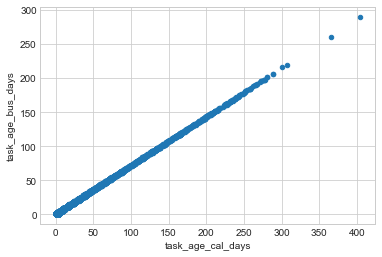

In [102]:

from pandas import DataFrame
ss = dataframe[dataframe.task_age_cal_days != '?']  # take all orders that are completed
ss['task_age_cal_days'] = ss['task_age_cal_days'].astype(int) # converted from object to integer
df = DataFrame(ss,columns=['task_age_cal_days','task_age_bus_days'])  # create new table with two columns
df.plot(x ='task_age_cal_days', y='task_age_bus_days', kind = 'scatter')  # plot to visualise the relation

